TOPIC: **SALES PREDICTION  USING LINEAR REGRESSION ALGORITHM**

**INTRODUCTION**

Machine learning-based sales prediction based on advertising budget is an important and powerful tool for businesses. It allows you to better understand customer behavior and identify new growth opportunities. Businesses can use machine learning algorithms to analyze their advertising data to determine what works and what doesn't, and then use that insight to inform their advertising budget decisions and sales prediction strategies. This enables businesses to maximize their return on investment while also improving their sales performance. Businesses can also use machine learning to detect patterns in their sales data, identify trends, and make more informed marketing decisions. Finally, machine learning can assist businesses in making better decisions about their advertising budgets and sales forecasting strategies, resulting in increased revenue.


**OBJECTIVES**

- To develop a model that predicts weekly sales for an electronic company that sells TVs, Radio and Newspapers.
- To visualize trends and relationships between sales and money used to advertise their products.

**DATA DESCRIPTION**

The dataset consists of four variables, TVs, Radio, Newspaper( Which is the amount of money spent on advertising the products) and sales(Total number of sales the company makes after selling its products). The data is from an elctronic company that has been sellings its products for the past 1 year.


To achieve objectives of developing the model; following machine learning steps are taken into consideration;

- Importing libraries
- Reading the dataset
- Data Pre-processing
- Exploratory Data Analysis.
- Splitting data
- Choose appropriate model
- Train the model
- Model Evaluation

**IMPORTING LIBRARIES**

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

**numpy**: NumPy stands for numeric Python, a python package for the computation and processing of the multi-dimensional and single-dimensional array elements.

**pandas**: Pandas provide high-performance data manipulation in Python.

**matplotlib**: Matplotlib is a library used for data visualization. It is mainly used for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots, and so on.

**seaborn**: Seaborn is a library used for making statistical graphics of the dataset. It provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It is used to summarize data in visualizations and show the data’s distribution.

In [3]:
#loading the dataset locally
data=pd.read_csv('https://raw.githubusercontent.com/PhylisKorir/SalesPrediction-using-Linear-Regression/main/Electronic_sales.csv')


**Exploratory Data Analysis(EDA)**

EDA is an approach of using visualization and statistical techniques to analyze and investigate datasets and summarizing their characteristics

In [4]:
#number of columns and rows
data.shape

(200, 4)

In [5]:
#previewing the first five rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#previewing the last five rows
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
#Basic information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#Describe the data - Descriptive statistics.

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#Data types
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
#columns
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
#Find the duplicates

data.duplicated().sum()

0

In [12]:
#unique values

data['TV'].unique()

data['Newspaper'].unique()

data['Radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

**DATA CLEANING**

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
It involves handling missing values and handling outliers

In [13]:
#Handling Missing values
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

The dataset has no null value

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


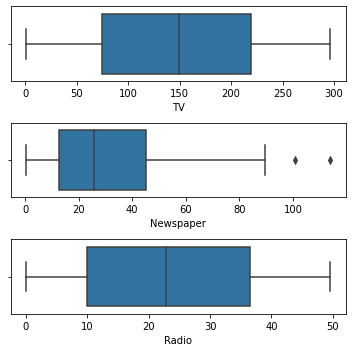

In [14]:
#Handling outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

The news paper column has two extreme values(outliers)

**DATA VISUALIZATION**

Data visualization is the graphical representation of data, allowing it to be more easily understood. Data visualization can help to identify patterns, trends, and correlations that may not be readily apparent in the raw data. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


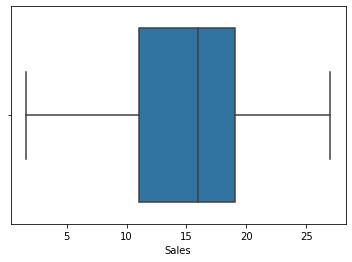

In [15]:
#Target variable
sns.boxplot(data['Sales'])
plt.show()

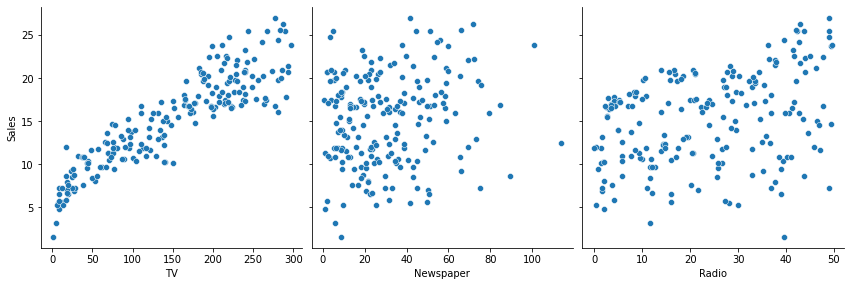

In [16]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

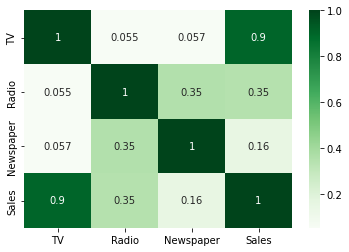

In [17]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="Greens", annot = True)
plt.show()

Finding;

**As it is visible from the scatterplot and the heatmap, the variable TV seems to be most correlated with Sales**

**Our dataset is now clean ready for modelling**

**splitting the dataset.**

Splitting data is very important step in machine learning process where data is split  into x and y . 

X is the input data, while y is the output data. 

Splitting allows one to train the model on a subset of the data, and then test its performance on a different subset.
It also ensures the model is not overfitting the data.

In [18]:
#Setting the values for independent (X) variable and dependent (Y) variable
X= data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [19]:
#Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

**Implementing the linear model**

In [20]:
#Fitting the Multiple Linear Regression model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

**Model Equation**


In [21]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  4.334595861728431
Coefficients:


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558054),
 ('Newspaper', 0.0062899501461303325)]

**Model Prediction**

In [22]:
#Prediction of test set
y_pred= model.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of X_test to this method and compare the predicted values called y_pred with y_test values to check how accurate our predicted values are as follows;

In [23]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head(10)

,Actual value,Predicted value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484
167,17.2,16.160544
116,12.2,13.561806
96,16.7,15.393381
52,22.6,20.819808
69,22.3,21.005371


In [26]:
data['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

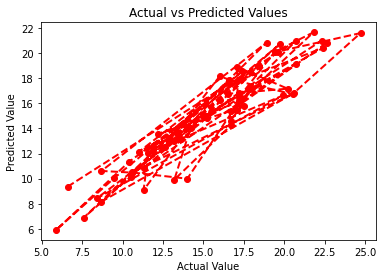

In [24]:
x = plt.plot(mlr_diff['Actual value'],mlr_diff['Predicted value'], color='red', marker='o', linestyle='dashed', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

**MODEL EVALUATION**

Model evaluation is the process of assessing a machine learning model's performance on a specific task. It is a measure of how well a model generalizes to unseen data. It is used to compare different models and tune the hyperparameters of a model.

I have evaluated the above model using R squared, root mean squared error and mean square error as shown the code below;

In [25]:
#model evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 90.11
Mean Absolute Error: 1.227818356658941
Mean Square Error: 2.6360765623280655
Root Mean Square Error: 1.623599877533891


R squared metric measures the amount of variance explained by the model in the dependent variable. It is a measure of how well the model fits the data.

Mean Absolute Error (MAE)- MAE measures the average magnitude of the errors in a set of predictions.

Root Mean Square Error (RMSE) is a metric used to evaluate the performance of regression models. It measures the average magnitude of the errors in a set of predictions. The lower the RMSE, the better the model.



**EVALUATION FINDINGS.**

The Linear Regression model performs well as 90.11% of the data fit the regression model.
Also, the mean absolute error, mean square error, and the root mean square error are less

**CONCLUSION**

Before analyzing data i wasn't sure of the relationship between sales and adverts. My expectation was to to the correlation and the relationship between the products and my objective has been met.

from the above findings, we can note that it is important to understand the relationship between the variables and amount to use in advertising to maximize the results.
Variable TV seems to maximize sales when more money is used to advertised.

Advertising products is essential in order to maximize sales as it help to create brand awareness, build customer trust, and encourage customers to make a purchase. Advertising can also help to reach a wider audience, target specific demographics, and create a lasting impression.

**The most important steps in carrying out the analysis include;**

Data Preprocessing: This step is critical for preparing the data for machine learning models. It involves cleaning the data by removing outliers.This is important because machine learning algorithms can be sensitive to the scale of the data and may not perform as expected if the data is not preprocessed.

Clean data produce better results.

Model Evaluation: Model evaluation is the process of assessing the performance of the trained model on unseen data. This is important because it helps us identify any overfitting or underfitting that may